### Student Information
Name: Sofiia Stankevich 妮雅

Student ID: S10910630

GitHub ID: stankevichhhh

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

Home exercises solutions can be found here: https://github.com/stankevichhhh/DM2024-Lab1-Master

## Part 2

In [26]:
import pandas as pd

ds = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

X = pd.DataFrame(ds)

X.head()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [27]:
# add category to the dataframe
X["category"] = X["sentiment"].apply(lambda x: 0 if x == "not nostalgia" else 1)

In [28]:
import helpers.data_mining_helpers as dmh

X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [29]:
sum(X.duplicated())

1

In [30]:
X[X.duplicated(keep=False)]

,sentiment,comment,category
62,not nostalgia,never heard this song before... WOW What an am...,0
78,not nostalgia,never heard this song before... WOW What an am...,0


The commentary and sentiment are absolutely the same, let's remove one of them.

In [31]:
X = X.drop_duplicates(keep='last')
sum(X.duplicated())

0

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment    1499
comment      1499
category     1499
dtype: int64

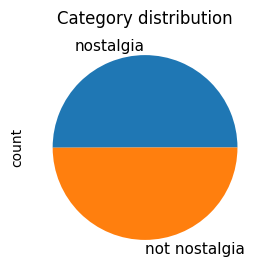

In [33]:
X.sentiment.value_counts().plot(
    kind="pie",
    title="Category distribution",
    rot=0,
    fontsize=11,
    figsize=(4, 3),
)
X.count()

In [34]:
X_sample = X.sample(n=1000)

In [35]:
X_sample.head(5)

,sentiment,comment,category
1208,nostalgia,I get flashbacks from this song when I was a c...,1
1442,nostalgia,The song my wife and I danced to at our Weddin...,1
240,nostalgia,Ya I have got some old pictures my mom took of...,1
1404,nostalgia,I remember listening this track down at the sk...,1
1003,nostalgia,These days I really wish It could be yesterday...,1


In [36]:
X.sentiment.value_counts()

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64

In [37]:
X_sample.sentiment.value_counts()

sentiment
nostalgia        516
not nostalgia    484
Name: count, dtype: int64

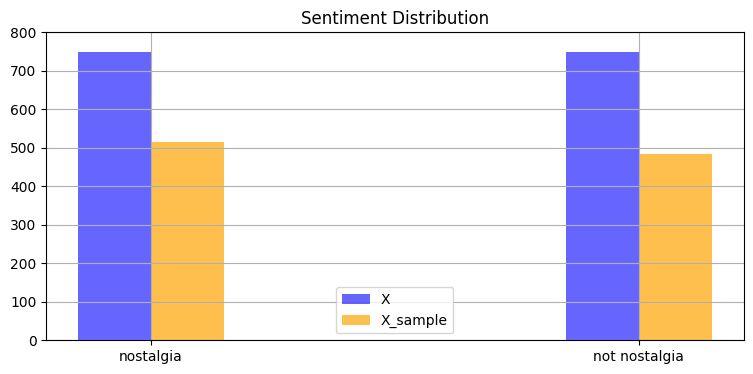

In [38]:
import numpy as np
category_comparison = pd.DataFrame(
    {
        "X": X.sentiment.value_counts(),
        "X_sample": X_sample.sentiment.value_counts(),
    }
)

plt.figure(figsize=(9, 4))

bar_width = 0.15
index = np.arange(len(category_comparison))

plt.bar(index, category_comparison["X"], bar_width, label="X", color="blue", alpha=0.6)
plt.bar(
    index + bar_width,
    category_comparison["X_sample"],
    bar_width,
    label="X_sample",
    color="orange",
    alpha=0.7,
)

plt.title("Sentiment Distribution")

plt.xticks(index + bar_width / 2, category_comparison.index, rotation=0)
plt.ylim(0, max(category_comparison.max()) + 50)
plt.legend()
plt.grid("axis=y")

plt.show()

In [39]:
X["unigrams"] = X["comment"].apply(lambda x: dmh.tokenize_text(x))
X[0:4]

,sentiment,comment,category,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [40]:
list(X[:1]["unigrams"])[0][:10]

['He', 'was', 'a', 'singer', 'with', 'a', 'golden', 'voice', 'that', 'I']

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_counts = count_vect.fit_transform(
    X.comment
)

X_counts.shape

(1499, 3730)

In [42]:
count_vect.get_feature_names_out()[:50]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12',
       '13', '14', '15', '150', '16', '16years', '17', '17th', '18', '19',
       '1927', '1930', '1930s', '1950', '1950s', '1952', '1954', '1955',
       '1956', '1957', '1958', '1960', '1960s', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1970s', '1973',
       '1974', '1975', '1976', '1977', '1979', '1980'], dtype=object)

In [43]:
analyze = count_vect.build_analyzer()
analyze(X['comment'][0])[:10]

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear']

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(tokenizer=analyze)  # analyze <CountVectorizer>

X_tfidf = tfidf_vectorizer.fit_transform(X["comment"])

print(X_tfidf[0])

  (np.int32(0), np.int32(1598))	0.10512815802912398
  (np.int32(0), np.int32(3570))	0.1395574769171071
  (np.int32(0), np.int32(2973))	0.13337780025660986
  (np.int32(0), np.int32(3650))	0.09117642312434776
  (np.int32(0), np.int32(1470))	0.17742470356320433
  (np.int32(0), np.int32(3534))	0.10560382174971122
  (np.int32(0), np.int32(3282))	0.08099760357962565
  (np.int32(0), np.int32(2028))	0.08426437228313143
  (np.int32(0), np.int32(3336))	0.05656163791989449
  (np.int32(0), np.int32(1606))	0.11892115591975148
  (np.int32(0), np.int32(233))	0.19791015577918225
  (np.int32(0), np.int32(3284))	0.1516330924946833
  (np.int32(0), np.int32(3328))	0.18797687737677285
  (np.int32(0), np.int32(1651))	0.22761435073116082
  (np.int32(0), np.int32(1512))	0.09515621480982876
  (np.int32(0), np.int32(1249))	0.19852539212933534
  (np.int32(0), np.int32(323))	0.10633155023896874
  (np.int32(0), np.int32(214))	0.14662969149477417
  (np.int32(0), np.int32(2341))	0.061599247801622355
  (np.int32(0), 

/home/rukaton/Work/DM2024-Lab1-Homework/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


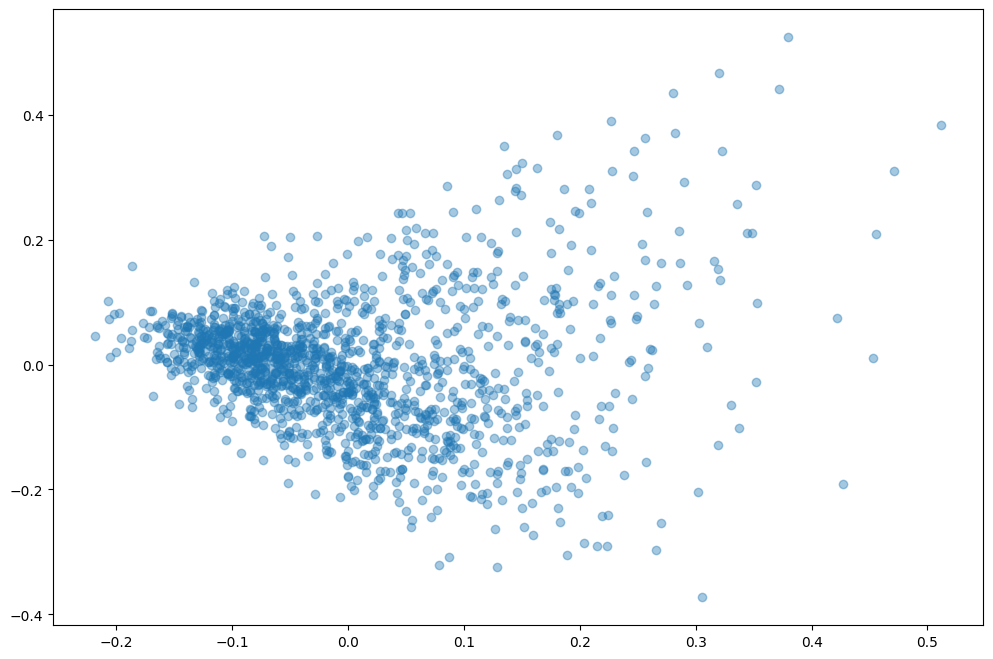

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_tfidf_2d = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(12, 8))
plt.scatter(X_tfidf_2d[:, 0], X_tfidf_2d[:, 1], alpha=0.4)

plt.show()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer_2 = TfidfVectorizer(
    tokenizer=analyze, norm="l1"
)  # analyze <CountVectorizer>

X_tfidf_2 = tfidf_vectorizer_2.fit_transform(X["comment"])

print(X_tfidf_2[0])

  (np.int32(0), np.int32(1598))	0.01653949647419642
  (np.int32(0), np.int32(3570))	0.021956157519461058
  (np.int32(0), np.int32(2973))	0.020983927602623246
  (np.int32(0), np.int32(3650))	0.01434451204193287
  (np.int32(0), np.int32(1470))	0.027913694237903464
  (np.int32(0), np.int32(3534))	0.016614331214736402
  (np.int32(0), np.int32(3282))	0.012743109019873132
  (np.int32(0), np.int32(2028))	0.013257059901031732
  (np.int32(0), np.int32(3336))	0.008898672139691676
  (np.int32(0), np.int32(1606))	0.018709507290113433
  (np.int32(0), np.int32(233))	0.03113660873626861
  (np.int32(0), np.int32(3284))	0.02385597774853558
  (np.int32(0), np.int32(3328))	0.02957383596259985
  (np.int32(0), np.int32(1651))	0.035809880263969
  (np.int32(0), np.int32(1512))	0.014970640681339012
  (np.int32(0), np.int32(1249))	0.031233402018248646
  (np.int32(0), np.int32(323))	0.016728822546154126
  (np.int32(0), np.int32(214))	0.023068807738631455
  (np.int32(0), np.int32(2341))	0.009691224129940881
  (n

/home/rukaton/Work/DM2024-Lab1-Homework/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


NameError: name 'sns' is not defined

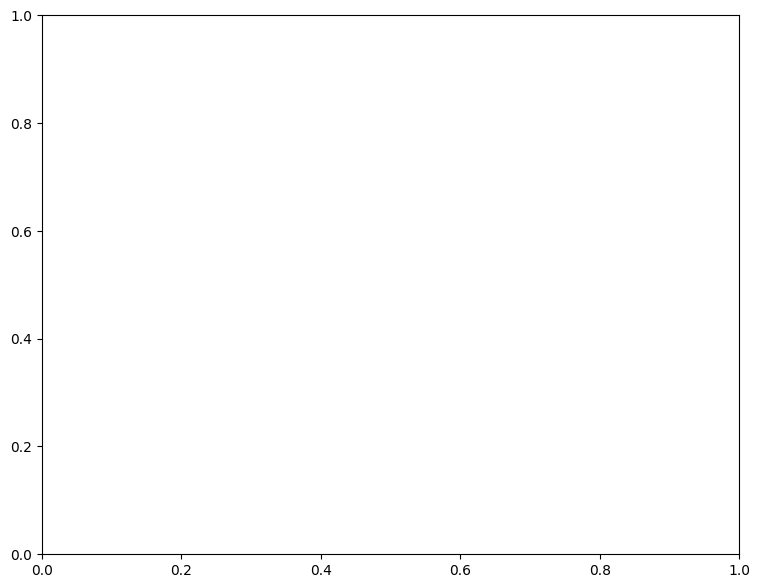

In [47]:
# first twenty features only
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_" + str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

In [139]:
term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))

In [140]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

np.int64(1)

In [143]:
df = pd.DataFrame(
    {
        "Feature": count_vect.get_feature_names_out(),
        "Frequency": term_frequencies,
    }
)

df = df.sort_values(by="Frequency", ascending=False).head(100)

fig = px.area(df, x="Feature", y="Frequency")
fig.update_layout(
    title=f"Top 100 Term Frequencies"
)

fig.show()

In [144]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each category
categories = X["sentiment"].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X["sentiment"] == category].copy()


# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(
        df["comment"]
    )  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df


# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [153]:
category_number = 0
print(
    f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:"
)
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,14,15,150,...,yesterday,yet,younger,youngest,youngsters,yourself,youth,yrs,yuo,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
category_number = 1

word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
top_5_percent_indices = sorted_indices[:top_5_percent_index]
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")
print('\n'+'-'*5+'\n')

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_index = int(0.01 * total_terms)
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

filtered_words = [
    count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices
]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['neighborhood', 'neighbor', 'needed', 'nearly', 'nearer', 'nc', '16years', '150', '1954', '1930s', 'featured', 'imprinted', 'impossible', 'impersonate', 'insane', 'fathers', 'head', 'he', '1981', 'nicer', '15', '07', '1977', '1976', '1975', 'natural', 'naples', 'nana', 'nan', 'names', 'never', 'na', '21st', '20s', '2040', '2019', '2018', '2017', '2015', '2010', '2009', '2002', '2000s', 'musician', 'murray', 'munster', 'mummy', 'naver', 'happened', 'happen', 'hank', 'hanged', 'handball', '3pm', 'ms', 'mph', 'movie', 'move', 'myanmar', '30s', '29th', '29', '1980s', '1979', '21yr', '45s', '45rpm', '42', '40th', '40s', '400', 'hdqrs', 'nelson', 'had', 'habit', 'gut', 'gunner', 'gun', 'guessing', 'happening', '8th', '5th', '59', '58', '57', '53', '50s', '50', '46', '70s', 'mostly', 'morning', '27', '25', '22nd', '22', '61', '60', 'haired', 'hahaha', 'hd', 'hawaii', 'having', 'haven', 'hauntingly', 'haunting', 'hats', 'hatin

In [154]:
category_number = 1


# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(
    term_document_df, top_percent=0.05, bottom_percent=0.01
):
    word_sums = term_document_df.sum(axis=0)
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat(
        [sorted_words.head(bottom_n), sorted_words.tail(top_n)]
    ).index

    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)


# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(
        term_document_dfs[category]
    )

term_document_dfs = filtered_term_document_dfs

filtered_term_document_dfs[categories[category_number]]

,07,11,15,16,18,19,1950s,1954,1960,1960s,...,wrote,ya,yarbirds,yardbirds,yeh,yokel,youngster,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
!pip install -U pami==2024.10.24.2

  Using cached pami-2024.10.24.2-py3-none-any.whl (1.1 MB)
  Attempting uninstall: pami
    Found existing installation: pami 2023.10.27.1
    Uninstalling pami-2023.10.27.1:
      Successfully uninstalled pami-2023.10.27.1

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [63]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(".", "_")

    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f"td_freq_db_{category_safe}.csv", ">=", 1)

ImportError: cannot import name 'DenseFormatDF' from 'PAMI.extras.DF2DB' (/home/rukaton/Work/DM2024-Lab1-Homework/.venv/lib/python3.9/site-packages/PAMI/extras/DF2DB/__init__.py)